In [1]:
#LIBRERÍAS NECESARIAS
library("FNN")
library("MASS")
library("stats")
library("readr")
library("caret")
library("e1071")
library("mclust")
library("sparcl")
library("kohonen")
library("cluster")
library("fields")
library(tree)
library(class)
library(randomForest)
library(tsne)
library(Rtsne)


Warning message:
"package 'FNN' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.
Warning message:
"package 'kohonen' was built under R version 3.5.3"
Attaching package: 'kohonen'

The following object is masked from 'package:mclust':

    map

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-1 (2018-12-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps

Attaching package: 'maps'

The following object is masked from 'package:cluster':

    votes.repub

The f

# · Creación del dataset

In [2]:
corazon=read.csv('corazon_r2_FACS.csv', header = TRUE, sep = ',')
corazon=corazon[,-1]
bazo=read.csv('bazo_r2_FACS.csv',header=TRUE)
bazo=bazo[,-1]
glandula=read.csv('glandula_r2_FACS.csv',header=TRUE)
glandula=glandula[,-1]
timo=read.csv('timo_r2_FACS.csv', header = TRUE, sep = ',')
timo=timo[,-1]
pulmon=read.csv('pulmon_r2_FACS.csv',header=TRUE)
pulmon=pulmon[,-1]
rinon=read.csv('riñon_r2_FACS.csv',header=TRUE)
rinon=rinon[,-1]
medula=read.csv('medula_r2_FACS.csv', header = TRUE, sep = ',')
medula=medula[,-1]
vejiga=read.csv('vejiga_r2_FACS.csv',header=TRUE)
vejiga=vejiga[,-1]
higado=read.csv('higado_r2_FACS.csv',header=TRUE)
higado=higado[,-1]

df=rbind(corazon,bazo,glandula,timo,pulmon,rinon,medula,vejiga,higado)
dim(df)

[1]  3600 23434

### Separamos en train y test

In [3]:
y=df$etiqueta
x=df[,-ncol(df)]

In [4]:
set.seed(2)
indtrain = sample(1:3600, round(0.75*3600))
indtest = setdiff(1:3600, indtrain)
df.occ=data.frame(y, x)
df.train=df.occ[indtrain,]
df.test=df.occ[indtest,]

# · Clasificación con todos los datos

### KNN (dura mucho tiempo)

In [5]:
## predicción sobre test con k=1
predd=knn(df.train[,-1],df.test[,-1],df.train$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test$y))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  79   2   0   4  18   1   3  24   0
         2   0  79   2   2   0   9   0   3   0
         3   0   0  86   0   0   2   0   0   0
         4   6   8   0  94   2   6   1   4   0
         5   2   2   2   0  69   3   0   3   0
         6   0   2   4   0   3  76   0   0   0
         7   0   8   0   2   0   7  98   5   0
         8   4   3   0   1   0   1   1  67   0
         9   0   0   0   0   0   1   1   0 100

Overall Statistics
                                        
               Accuracy : 0.8311        
                 95% CI : (0.805, 0.855)
    No Information Rate : 0.1178        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.81          
 Mcnemar's Test P-Value : NA            

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.86813  

# · Segmentación con todos los datos

### K-means

In [6]:
kmModel<-kmeans(df[,-ncol(df)],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster        3600 -none- numeric
centers      210897 -none- numeric
totss             1 -none- numeric
withinss          9 -none- numeric
tot.withinss      1 -none- numeric
betweenss         1 -none- numeric
size              9 -none- numeric
iter              1 -none- numeric
ifault            1 -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  30  50   0  25 186   0 104   5   0
         2  36  25  19  14 109  88  97   6   6
         3   9 162  43  53  13   6 113   1   0
         4  11  71   0  32  76   0 100  11  99
         5  10 139   0  98  68   0  78   7   0
         6 129  23  14   7 117  17  88   3   2
         7 245  12   1   8  98   0  34   2   0
         8 108  80   0  40  62   0  93  17   0
         9   2 134  74  92   5   0  91   2   0

Overall Statistics
                                          
               Accuracy : 0.0739          
                 95% CI : (0.0656, 0.0829)
    No Information Rate : 0.2217          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0419         
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

## t-sne

sigma summary: Min. : 0.0170560573084488 |1st Qu. : 0.378300556321651 |Median : 0.455650929257509 |Mean : 0.463812821186704 |3rd Qu. : 0.553062498590817 |Max. : 1.3909615900874 |
Epoch: Iteration #100 error is: 19.8673661399003
Epoch: Iteration #200 error is: 1.7431169540239
Epoch: Iteration #300 error is: 1.54799063463878
Epoch: Iteration #400 error is: 1.46744599830094
Epoch: Iteration #500 error is: 1.43608421446155
Epoch: Iteration #600 error is: 1.41985589927417
Epoch: Iteration #700 error is: 1.41022619735679
Epoch: Iteration #800 error is: 1.40398596167107
Epoch: Iteration #900 error is: 1.39968030089773
Epoch: Iteration #1000 error is: 1.39655196481106


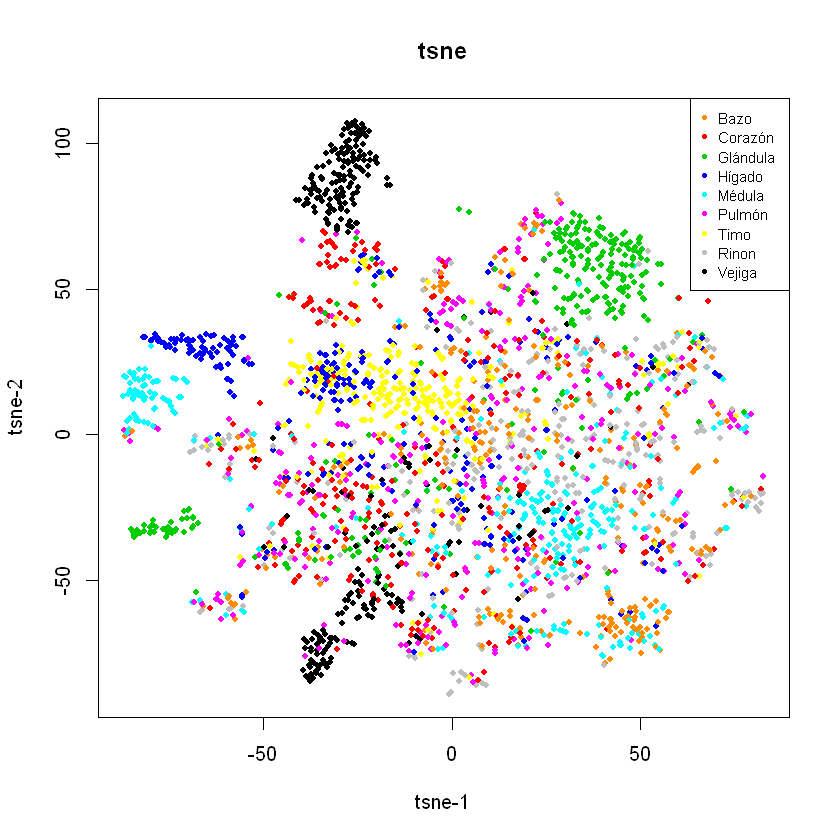

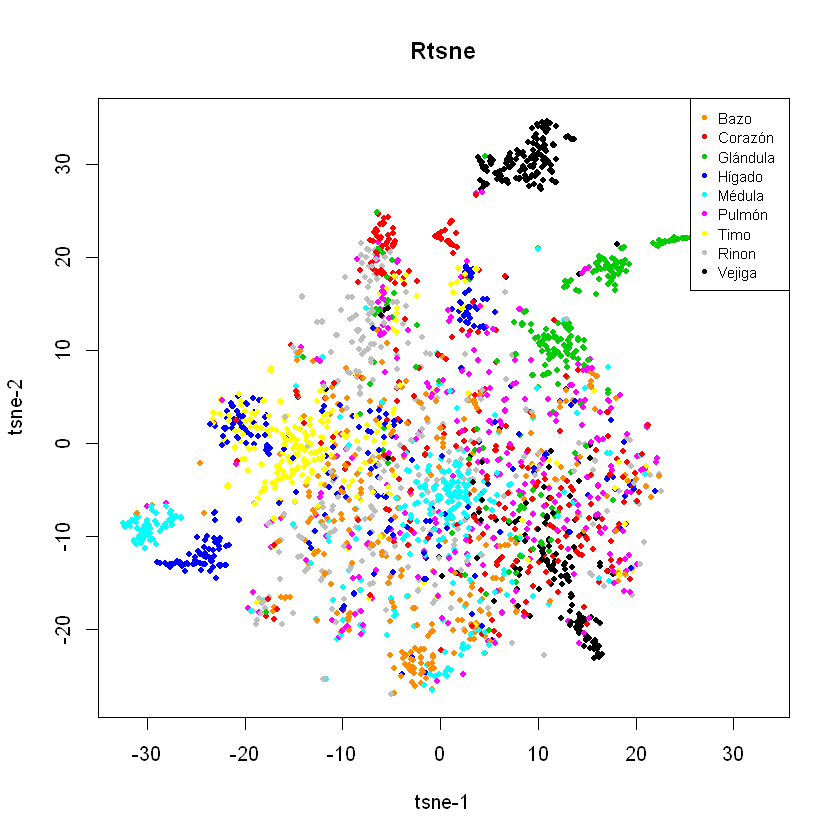

In [7]:
rtsne <- Rtsne(df.train[,2:1000],check_duplicates = FALSE)
tsne <- tsne(df.train[,2:1000])
colors=df.train$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [8]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  29  29   9   5  43  82  57  38  17
         2  68  22  10  35  25  24  37  35  40
         3  34 176  39  10  17   3  17   3   7
         4  17  13  76  10  11  17  36  21  96
         5  14   8  68   0  32 105  41  36   4
         6  56  42  15   8  42  25  38  45  23
         7  15  10   6  10  17   3  59  12 164
         8  18  19  17   3  80  44  71  31  11
         9 110   4   2 143   3   5  13  18   2

Overall Statistics
                                          
               Accuracy : 0.0922          
                 95% CI : (0.0816, 0.1038)
    No Information Rate : 0.1367          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0213         
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [9]:
#rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9,nstart = 100)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0 115  51  17   0  31  37  51   7
         2   0  13  19   5   1  82  30  52  94
         3 151   3   3   1   2  25  89  11  21
         4   0  18  92  77   0  17  15  38  40
         5   0  62  11  65   1  17  14 134   4
         6   4  39  15  10   2  68  70  45  41
         7   0   9 192  14   0  16   7  27  31
         8   0  45  38  28   0  25  24  57  77
         9   2   5   1   0 143 129   6  10   4

Overall Statistics
                                          
               Accuracy : 0.0852          
                 95% CI : (0.0749, 0.0964)
    No Information Rate : 0.1574          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0287         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4  Class: 5 Class: 6
Sensitivity   

# · Correlación para quedarnos con las columnas (genes) importantes

Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), m

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"

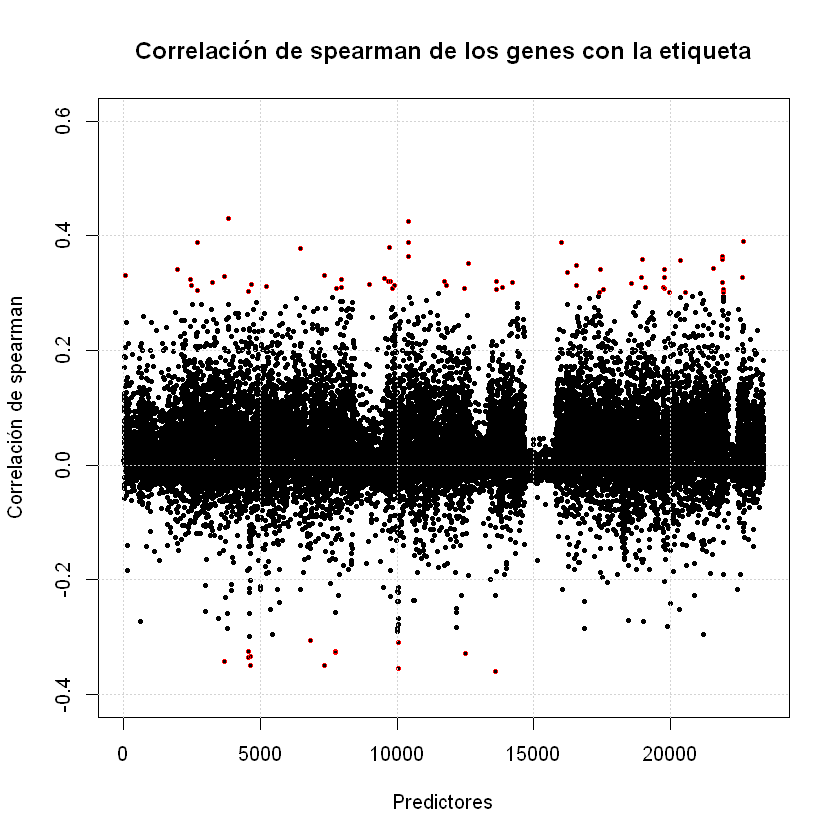

In [26]:
## correlación de spearman de cada gen con la etiqueta
r.xy = c()
for (ivar in 1:ncol(x)) {
  r.xy[ivar] = cor(as.numeric(y), as.integer((x[,ivar])), method = "spearman")
}
plot(r.xy, ylim = c(-0.4, 0.6), pch = 19, cex = 0.5, main="Correlación de spearman de los genes con la etiqueta", xlab = "Predictores", ylab = "Correlación de spearman")
grid()

ind.sele = which(abs(r.xy) > 0.3)
points(ind.sele, r.xy[ind.sele], col = "red", cex = 0.5)
#para eliminar predictores que no aportan ninguna informacion a nuestro problema (reducimos predictores)

In [12]:
length(ind.sele)

[1] 74

In [6]:
df.train2=df.train[,ind.sele]
df.test2=df.test[,ind.sele]
df.train2['y']=as.numeric(y[indtrain])
df.test2['y']=as.numeric(y[indtest])

# · Segmentación con índices seleccionados

### t-sne y Rt-sne

sigma summary: Min. : 2.98023223876953e-08 |1st Qu. : 0.374000347952318 |Median : 0.493839851940101 |Mean : 0.496695103005418 |3rd Qu. : 0.634270492759707 |Max. : 1.55356813809025 |
Epoch: Iteration #100 error is: 18.5318134797349
Epoch: Iteration #200 error is: 1.32675038797204
Epoch: Iteration #300 error is: 1.08444341740932
Epoch: Iteration #400 error is: 0.982143259040384
Epoch: Iteration #500 error is: 0.941641870299703
Epoch: Iteration #600 error is: 0.919590127324385
Epoch: Iteration #700 error is: 0.906472684659349
Epoch: Iteration #800 error is: 0.897673387557701
Epoch: Iteration #900 error is: 0.891415791911469
Epoch: Iteration #1000 error is: 0.886801528071209


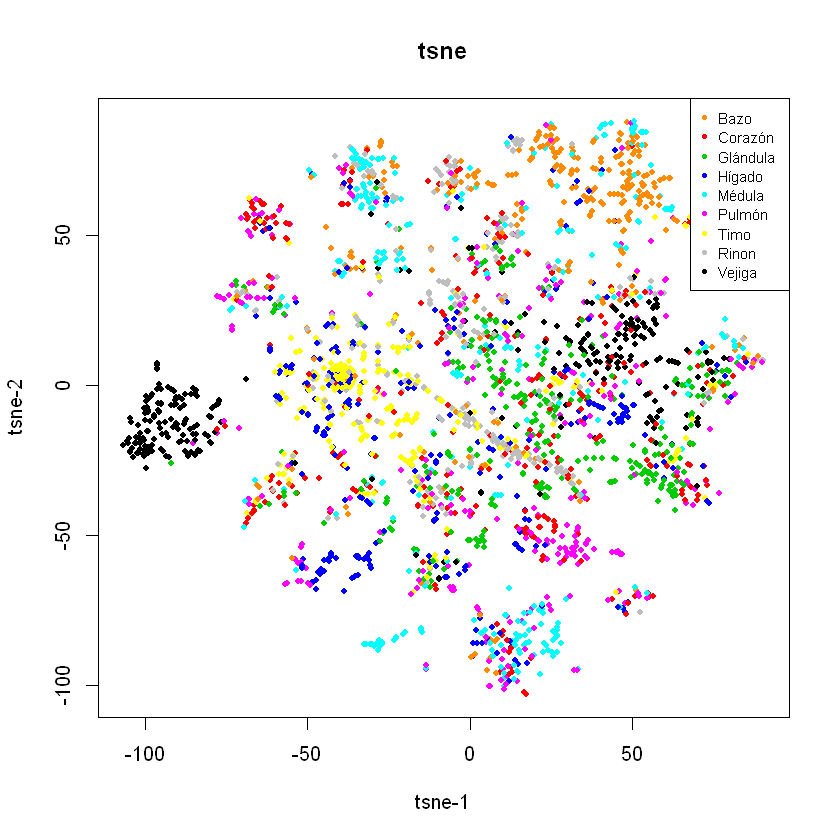

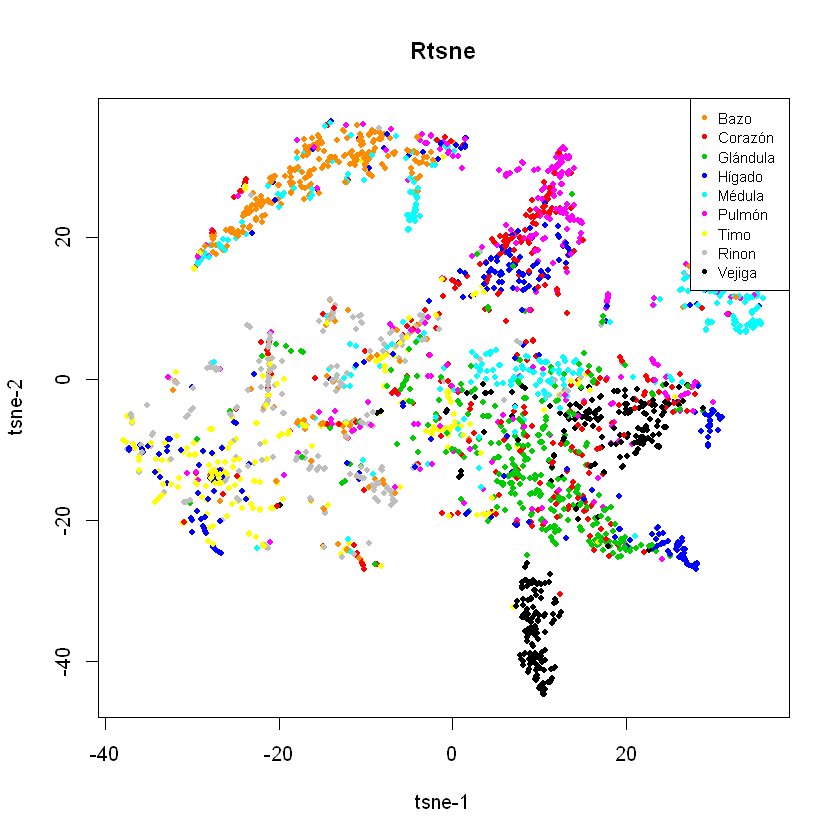

In [14]:
rtsne <- Rtsne(df.train2[,-ncol(df.train2)],check_duplicates = FALSE)
tsne <- tsne(df.train2[,-ncol(df.train2)])
colors=df.train2$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [15]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 172   9  10  14  44  19  23  11   7
         2   4  31  40  52  43  18  38  51  19
         3   0  48   0  94   5  11  54  88   6
         4  11  70  29  30  15  80  23  37   2
         5  45  35  73  13  73   7  32  26   4
         6  10  42  90  23  21  27  31  39  11
         7   7  36   3  35   6 167   7  21  14
         8  14  23   3  69  46  50  64  19   6
         9   1   6   0  13   7   0  23 107 143

Overall Statistics
                                          
               Accuracy : 0.1859          
                 95% CI : (0.1714, 0.2011)
    No Information Rate : 0.1478          
    P-Value [Acc > NIR] : 3.567e-08       
                                          
                  Kappa : 0.0845          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [16]:
#-rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   1   0 225  13   0   1  10  18  41
         2  90  50  16   8  27  46   9  17  33
         3   7  32   0   0  90 141   3   9  24
         4  83  26  19  13  59  11  72   4  10
         5   5  24  83  95   1  74   1   5  20
         6 122  33  24  45   9  23   5   8  25
         7   6   7   9   0   3  45 146  29  51
         8   1   7   2   3   0  10  69  71 131
         9   0 118   0   0 149  30   0   1   2

Overall Statistics
                                         
               Accuracy : 0.1137         
                 95% CI : (0.102, 0.1263)
    No Information Rate : 0.1411         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0027         
 Mcnemar's Test P-Value : <2e-16         

Statistics by Class:

                      Class: 1 Class: 2 Class: 3 Class: 4  Class: 5 Class: 6
Sensitivity          

### K-means

In [19]:
kmModel<-kmeans(df[,ind.sele],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster      3600   -none- numeric
centers       666   -none- numeric
totss           1   -none- numeric
withinss        9   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            9   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0   0  51 122   0 227   0   0
         2   0  15   0   1 337  10   0   1  36
         3   1   0   0   0 389   0   0   0  10
         4   0  66   0   4 269   0   9  47   5
         5   0   0   0  50 297   0  47   0   6
         6   0  20   0   5 351   1   3   3  17
         7   0   5   0   0 294  21   1   0  79
         8   0   2   0   1 276  21   1   0  99
         9 129  72  60   0 139   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.0883          
                 95% CI : (0.0793, 0.0981)
    No Information Rate : 0.6872          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0256         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5  Class: 6
Sensitivity   

# · Clasificación con índices seleccionados

### GLMs

In [8]:
# #GLM
# df.train$y=as.numeric(as.character(df.train$y))
# df.test$y=as.numeric(as.character(df.test$y))

numeros2<-function(n){
    df.train2$y[which(df.train2$y != n)] <- 0 ; df.train2$y[which(df.train2$y == n)] <- 1
    df.test$y[which(df.test2$y != n)] <- 0 ; df.test$y[which(df.test2$y == n)] <- 1
    DatT <- df.train2;
    Datt<- df.test2;
    M <- glm(y~., data = DatT[,], family = binomial(link = "logit"))
    Out <- M$fitted.values
    Outbin <- as.double(Out > 0.5)
    Acct<-100*sum(diag(table(DatT[,1], Outbin))) / length(Outbin)
    Out2<- predict(object=M, newdata = Datt[,]);
    Outbin2 <- as.double(Out2 > 0.5)
    AccT<-100*sum(diag(table(Datt[,1], Outbin2))) / length(Outbin2)
    
    return(AccT) 
}
A<-c()
for (i in 1:9){ 
    A<-c(A, numeros2(i))}

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warn

In [9]:
A
print(mean(A))

[1] 79.55556 83.33333 80.11111 84.00000 80.66667 81.22222 83.77778 80.88889
[9] 79.33333

[1] 81.4321


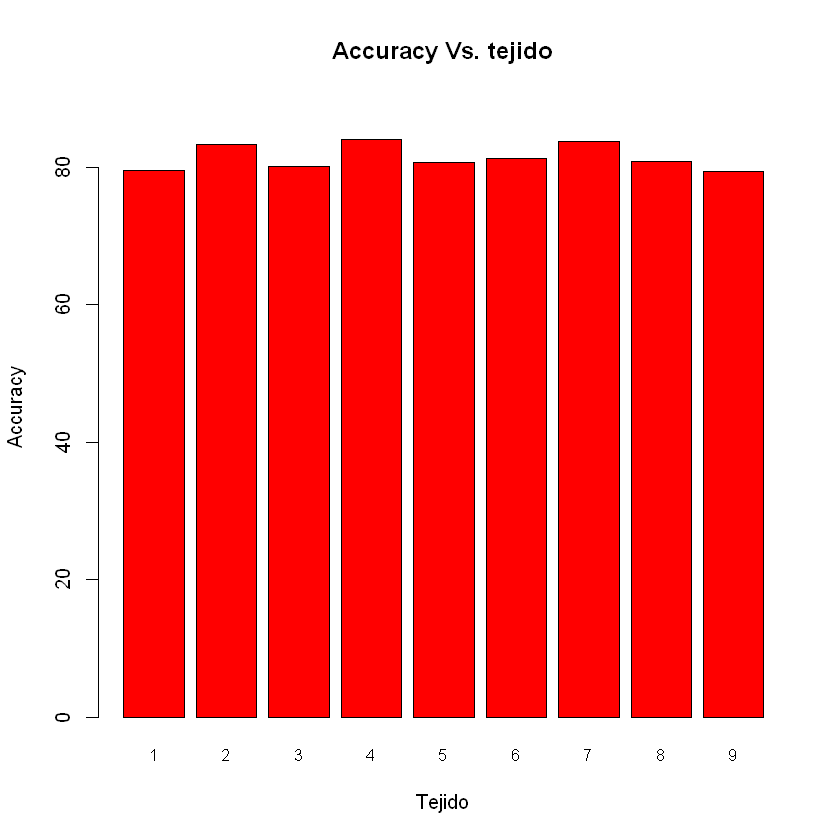

In [10]:
barplot(A,names.arg = 1:9,cex.names=0.8, ylab = "Accuracy", xlab="Tejido",col='red',ylim=c(0,90),main="Accuracy Vs. tejido")

### KNN

In [20]:
## predicción sobre test con k=1
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 63  3  2  3  8  5  4 13  0
         2  0 31 12 13  3 16  8  2  4
         3  0 21 51  4  5  5  3  0  5
         4  3 15  3 53  1  4 14  4  0
         5  7  4  4  1 57  9  4  3  3
         6  1 14  4  6  9 53  5  4  2
         7  5  8 11 20  3  6 54 16  1
         8 12  5  3  2  5  5 12 64  2
         9  0  3  4  1  1  3  0  0 83

Overall Statistics
                                          
               Accuracy : 0.5656          
                 95% CI : (0.5324, 0.5982)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5111          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.6923  0.29808  0.54255  0.51456  0.61957  0.50000
Specificity            0.9530 

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2, Foxe3, Gsdmc, Wfdc15a"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2, Foxe3, Gsdmc, Wfdc15a"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2, Foxe3, Gsdmc, Wfdc15a"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2, Foxe3, Gsdmc, Wfdc15a"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2, Foxe3, Gsdmc, Wfdc15a"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2, Foxe3, Gsdmc, 

,k
6,11


ERROR: Error in confusionMatrix.default(as.factor(predd2), as.factor(df.test2$y)): the data cannot have more levels than the reference


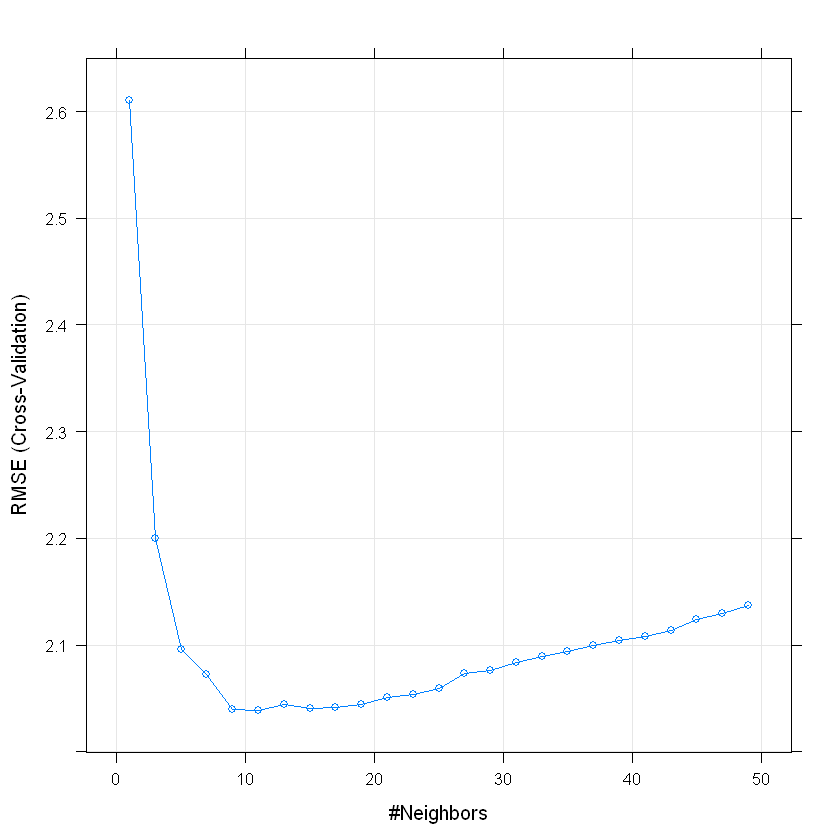

In [21]:
## búsqueda del k óptimo
trctrl=trainControl(method="cv", number=2) #divido mi train en 2, train y validation, de ahi saco mi model cv
knn.fit=train(y~.,df.train2, method="knn",trControl=trctrl, preProcess=c("center", "scale"), tuneGrid=expand.grid(k=seq(from = 1, to=50, by=2)))

plot(knn.fit)
knn.fit$bestTune
predd2 = predict(knn.fit, df.test2[,-ncol(df.test2)])
confusionMatrix(as.factor(predd2), as.factor(df.test2$y))

In [22]:
## predicción sobre test con k óptimo (11)
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=11)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 72  3  1  4 13  6  1  3  0
         2  1 20  6 10  2 13  1  4  0
         3  0 22 64  7  3  5  3  1  2
         4  0 14  0 52  0  5 10  1  0
         5  3  7  3  4 65  7  2  1  5
         6  0  9  0  2  1 54  1  0  0
         7  2 11 15 23  4  4 75 17  6
         8 13 12  3  1  2  9  8 79  2
         9  0  6  2  0  2  3  3  0 85

Overall Statistics
                                          
               Accuracy : 0.6289          
                 95% CI : (0.5964, 0.6605)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5825          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.7912  0.19231  0.68085  0.50485  0.70652  0.50943
Specificity            0.9617 

### Árboles de clasifición

In [11]:
df.train3=df.train2*1
df.test3=df.test2*1
df.train3$y=as.factor(df.train3$y)
df.test3$y=as.factor(df.test3$y)

In [13]:
## árbol completo
t = tree(formula = y ~ ., data = df.train3, control=tree.control(nrow(df.train3)) )

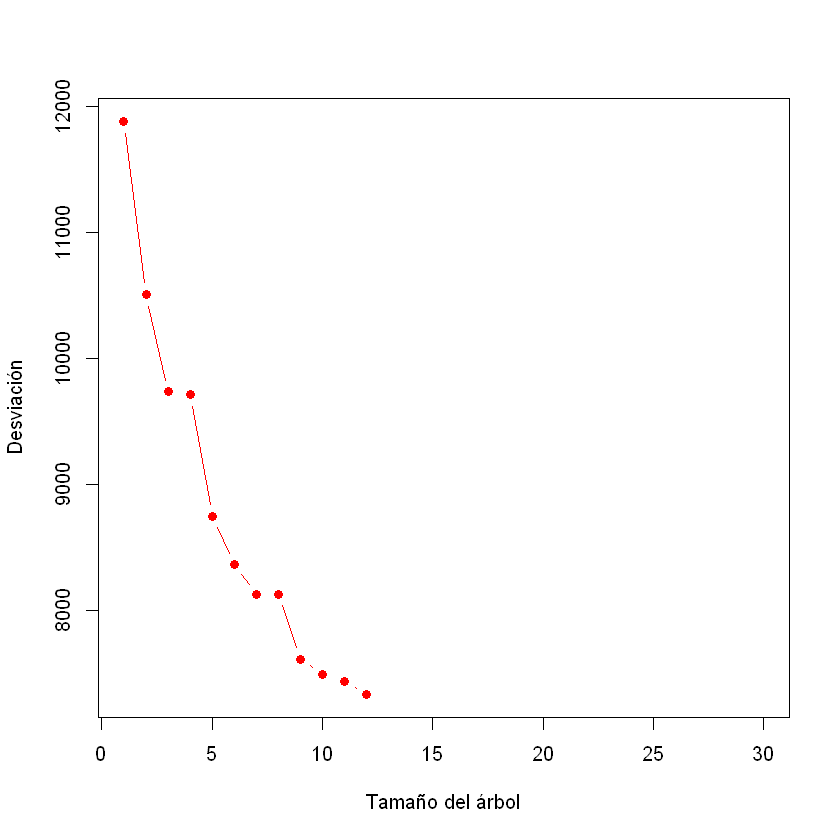

In [15]:
## búsqueda del tamaño de árbol óptimo
a=cv.tree(t, K = 10) #cross validation
plot(a$size,a$dev, xlab="Tamaño del árbol", ylab="Desviación", col="red",type="b", pch=19,xlim=c(1,30))

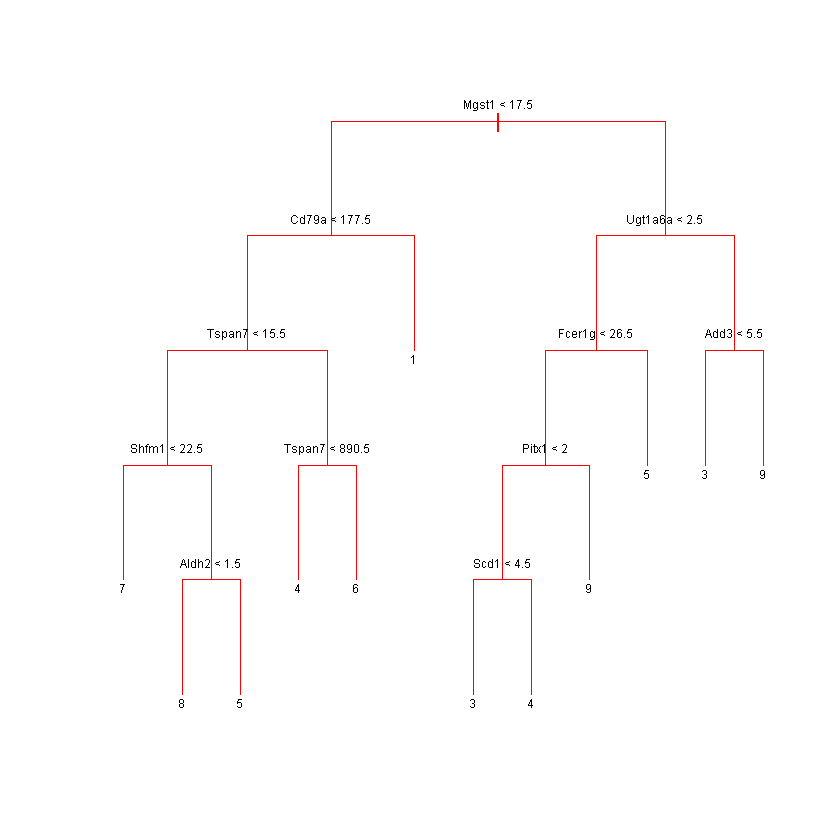

In [16]:
## podamos con tamaño óptimo
t.pruned=prune.tree(t, best = 12) #arbol podado
plot(t.pruned,type = "uniform",col="red")
text(t.pruned, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))

In [49]:
#predicción sobre test
pred.test= predict(t.pruned, df.test3,type="class")
confusionMatrix(pred.test,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 66  0  0  2 20  3  0  1  0
         2  0  0  0  0  0  0  0  0  0
         3  0 25 56 12  9 27 10  0  6
         4  2 35 11 47  1 16  4  2 10
         5  3 13  9  9 48 10  6 12  3
         6  0 12  0  7  0 29  0  1  0
         7 12 15  2 24  8 14 76 26  0
         8  8  2  4  1  6  5  8 64  0
         9  0  2 12  1  0  2  0  0 81

Overall Statistics
                                         
               Accuracy : 0.5189         
                 95% CI : (0.4857, 0.552)
    No Information Rate : 0.1178         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4592         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.72527   0.0000  0.59574  0.45631  0.52174  0.27358
Specificity           0.96786   1.0000

### Random Forest


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 8

        OOB estimate of  error rate: 28.41%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 231   0   0   0   8   3   8  59   0   0.2524272
2   2 146  47  13   9  27  24  28   0   0.5067568
3   0  18 265   0   3   2   9   8   1   0.1339869
4  13  28   2 164  11   8  59  11   1   0.4478114
5  46   3   8   0 235   7   3   6   0   0.2370130
6  13  30  34   8  27 146  12  21   3   0.5034014
7   5  13   9   7   0   1 227  32   2   0.2331081
8   6   7   1   1   4   2  51 222   0   0.2448980
9   0   1   1   0   0   0   1   0 297   0.0100000

[1] 297 301

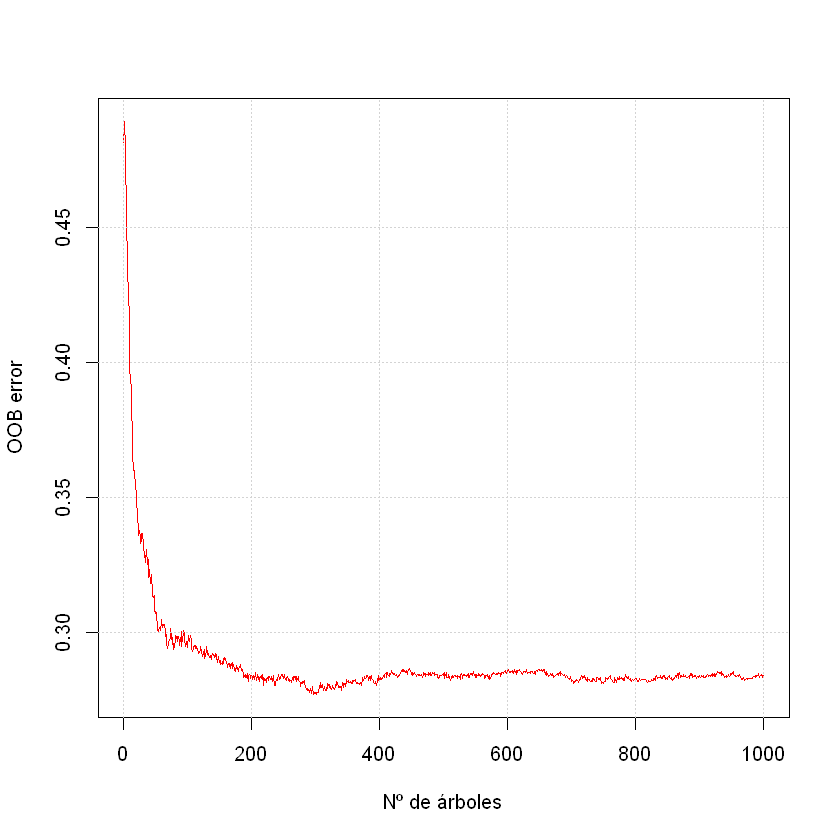

In [17]:
rf = randomForest(y ~., df.train3, ntree=1000)
rf
# OOB error
plot(rf$err.rate[, 1], type = "l", xlab = "Nº de árboles",col="red", ylab = "OOB error")
grid()
# número óptimo de árboles 
ntree = which(rf$err.rate[,1] == min(rf$err.rate[,1]))
ntree

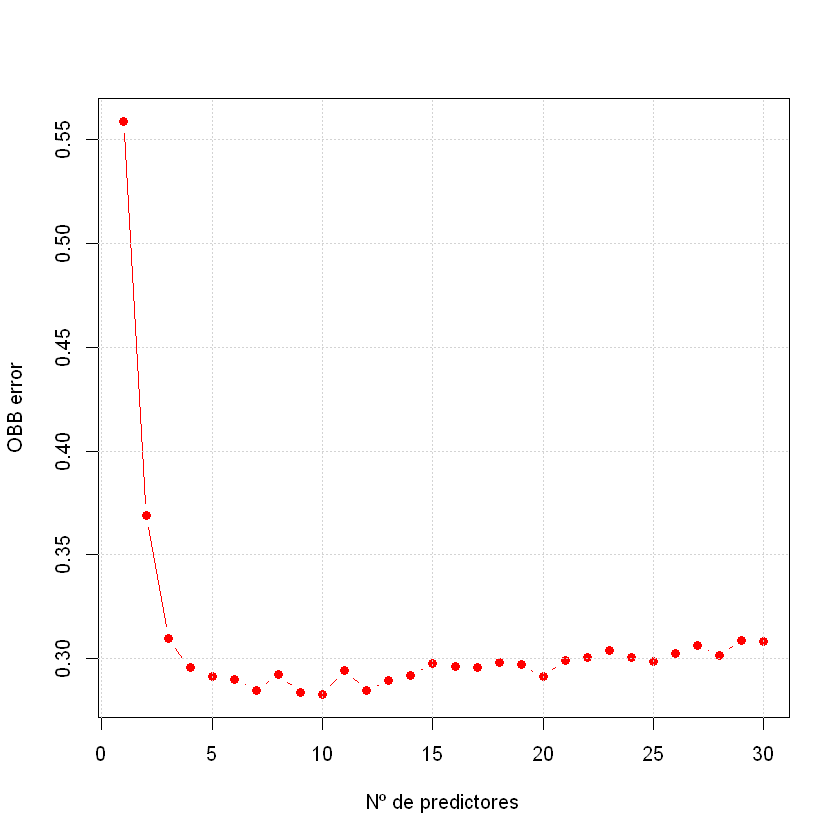

In [18]:
# búsqueda del número óptimo de predictores
err.oob = c()
for (mtry in 1:30) {
rf.mtry = randomForest(y ~., df.train3,ntree = ntree[1], mtry = mtry)
err.oob[mtry] = rf.mtry$err.rate[ntree[1], 1]
}

matplot(1:30 , err.oob, type = "b", pch = 19 ,lty = 1,col="red",ylab = "OBB error", xlab = "Nº de predictores")
grid()

In [19]:
## modelo con parámetros óptimos
rf.occ = randomForest(y ~., df.train3, ntree = ntree[1], mtry = 7)
rf.occ
## predicción sobre test
pred.r = predict(rf.occ, df.test3)


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = ntree[1],      mtry = 7) 
               Type of random forest: classification
                     Number of trees: 297
No. of variables tried at each split: 7

        OOB estimate of  error rate: 28.96%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 232   1   0   0   9   2   8  57   0   0.2491909
2   2 147  47  14   9  26  23  28   0   0.5033784
3   0  16 266   0   3   2   8   9   2   0.1307190
4  14  35   3 154   9   8  61  12   1   0.4814815
5  47   3   6   0 233  10   3   6   0   0.2435065
6  17  29  36   6  28 140  13  20   5   0.5238095
7   5  14   8   5   1   1 229  31   2   0.2263514
8   5   5   2   2   4   5  51 220   0   0.2517007
9   0   1   1   0   0   0   1   0 297   0.0100000

In [20]:
confusionMatrix(pred.r,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 71  0  1  2 15  3  0  3  0
         2  0 51  6  8  0 20  3  3  0
         3  0 16 79  1  0  2  3  0  1
         4  0  5  1 60  0  2  6  0  0
         5  0  3  0  3 74  5  0  2  0
         6  1 11  1  7  2 61  5  0  0
         7  3 14  4 20  0  6 76 11  0
         8 16  4  2  1  1  7 11 87  0
         9  0  0  0  1  0  0  0  0 99

Overall Statistics
                                          
               Accuracy : 0.7311          
                 95% CI : (0.7009, 0.7598)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6974          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.78022  0.49038  0.84043  0.58252  0.80435  0.57547
Specificity           0.97033 

In [23]:
importancia=rf.occ$importance
i<-data.frame(importancia)
i2=i[order(i,decreasing = TRUE),]
genes=labels(importancia)[[1]]
genes=genes[order(i,decreasing = TRUE)]
dd=data.frame(i2,genes)

In [24]:
dd[1:20,]

i2,genes
137.52714,Shfm1
130.93970,Aldh2
128.07781,Mgst1
125.31029,Cd74
120.95381,Tspan7
95.68695,Cd79a
93.55779,Fcer1g
79.54984,Add3
76.08514,Scd1
64.94732,Lass2


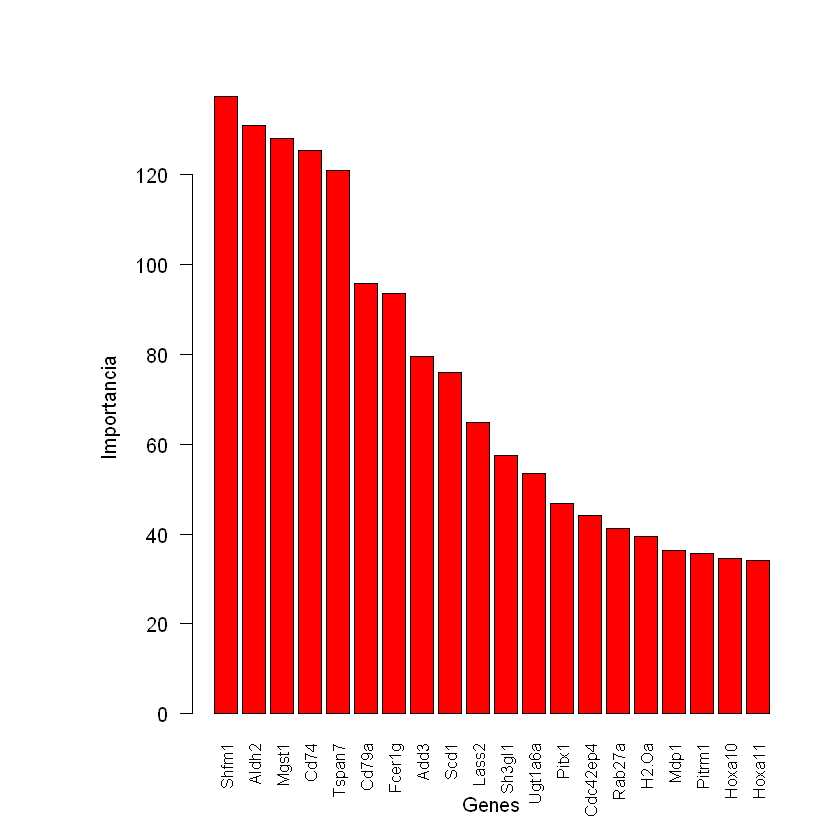

In [25]:
par(las=2) 
par(mar=c(5,8,4,2)) 
barplot(dd[1:20,1],names.arg = dd[1:20,2],cex.names=0.8, ylab = "Importancia", xlab="Genes",col = 'red')

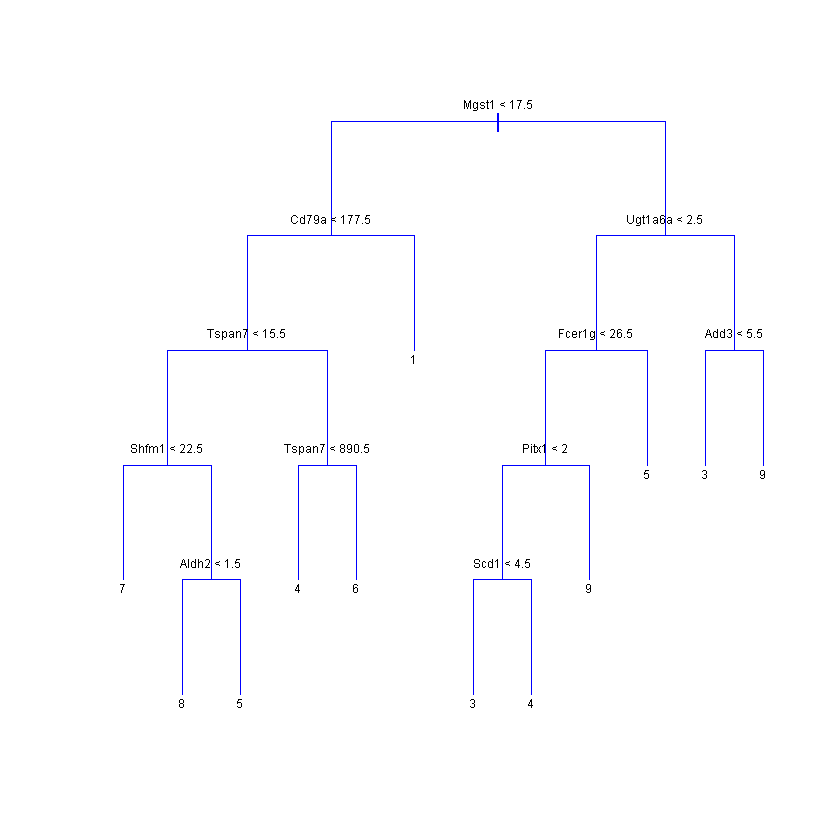

In [59]:
plot(t.pruned,type = "uniform",col="blue")
text(t.pruned, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))